<a href="https://colab.research.google.com/github/Juliana-CP/Telecom_X---Analise-de-Evasao-de-Clientes/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extração

In [189]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL do arquivo JSON (link raw)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Fazendo a requisição
response = requests.get(url)
data = response.json()

# Criando o DataFrame
df = pd.json_normalize(data)

# Visualizando as primeiras linhas
df.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [167]:
# Verificando quantas linhas e colunas existem
print(f"Shape: {df.shape}")

Shape: (7267, 21)


#🔧 Transformação

In [168]:
# Verificando a estrutura e tipos de dados
print("📌 Tipos de dados e colunas:")
print(df.dtypes)
print("\n📏 Dimensões do dataset:", df.shape)

📌 Tipos de dados e colunas:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

📏 Dimensões do dataset: (7267, 21)


In [169]:
# Verificando a quantidade de valores nulos por coluna
print(df.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [171]:
# Convertendo 'account.Charges.Total' para float64 tratando valores vazios
if 'account.Charges.Total' in df.columns:
    df['account.Charges.Total'] = (
        df['account.Charges.Total']
        .replace('[\$,R$]', '', regex=True)   # remove símbolos monetários
        .replace(',', '.', regex=True)        # troca vírgula por ponto decimal
        .replace(r'^\s*$', np.nan, regex=True) # substitui espaços vazios por NaN
        .astype(float)                         # converte para float64
    )

In [172]:
#Conferindo o tipo da coluna
print(df['account.Charges.Total'].dtype)
print(df['account.Charges.Total'].head())

float64
0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: account.Charges.Total, dtype: float64


In [173]:
# Verificando quantos ficaram como NaN após conversão
print(df['account.Charges.Total'].isnull().sum())

11


In [174]:
# Removendo as linhas com account.Charges.Total nulo
df = df.dropna(subset=['account.Charges.Total'])

In [175]:
# Verificando quantos ficaram como NaN após remoção
print(df['account.Charges.Total'].isnull().sum())

0


In [190]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [225]:
# Substituindo "No" por "Sem adesao" na coluna "internet.InternetService"
df['internet.InternetService'] = df['internet.InternetService'].replace('No', 'Sem adesao')


In [194]:
# Convertendo valores textuais como “Sim” e “Não” em binário (1 e 0)
# Definir mapeamento
mapa_binario = {'Yes': 1, 'No': 0}


In [195]:
# Selecionando colunas do tipo object que contêm 'Sim' ou 'Não'
cols_yes_no = df.select_dtypes(include='object').columns.tolist()

In [196]:
# Aplicando conversão
for col in cols_yes_no:
    if df[col].isin(['Yes', 'No']).any():  # verifica se a coluna possui esses valores
        df[col] = df[col].map(mapa_binario)

In [197]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,1.0,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,0.0,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4


In [198]:
# Substituindo os NaN por 0
df = df.fillna(0)

In [199]:
# Conferindo resultados
for col in cols_yes_no:
    if col in df.columns:
        print(f"{col}:\n{df[col].value_counts(dropna=False)}\n")

customerID:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Churn:
Churn
0.0    5398
1.0    1869
Name: count, dtype: int64

customer.gender:
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64

customer.Partner:
customer.Partner
0    3749
1    3518
Name: count, dtype: int64

customer.Dependents:
customer.Dependents
0    5086
1    2181
Name: count, dtype: int64

phone.PhoneService:
phone.PhoneService
1    6560
0     707
Name: count, dtype: int64

phone.MultipleLines:
phone.MultipleLines
0.0    4202
1.0    3065
Name: count, dtype: int64

internet.InternetService:
internet.InternetService
Fiber optic    3198
DSL            2488
sem adesao     1581
Name: count, dtype: int64

internet.OnlineSecurity:
internet.OnlineSecurity
0.0    5189
1.0    2078
Name: count, dtype: int64

internet.OnlineBacku

In [200]:
 #Verificando quantos ficaram como NaN após remoção
print(df.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [201]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   float64
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   float64
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   float64
 11  internet.OnlineBackup      7267 non-null   float64
 12  internet.DeviceProtection  7267 non-null   float64
 13  internet.TechSupport       7267 non-null   float

In [202]:
#Identificando as colunas relevantes para análise de evasão
colunas_relevantes = [
    'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total'
]

In [203]:
print("\n✅ Colunas selecionadas para análise de evasão:")
print(colunas_relevantes)


✅ Colunas selecionadas para análise de evasão:
['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [204]:
#Identificando as colunas relevantes com os dados dos clientes
colunas_clientes = [
    'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure'
]
print("\n✅ Colunas selecionadas com os dados dos clientes:")
print(colunas_clientes)


✅ Colunas selecionadas com os dados dos clientes:
['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure']


In [205]:
#Identificando as colunas relevantes com os dados dos servicos
colunas_servico = [
    'Churn', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]
print("\n✅ Colunas selecionadas com os dados dos serviços:")
print(colunas_servico)


✅ Colunas selecionadas com os dados dos serviços:
['Churn', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']


In [206]:
#Identificando as colunas relevantes com os dados de conta
colunas_conta = [
    'Churn', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total'
]
print("\n✅ Colunas selecionadas com os dados dos serviços:")
print(colunas_conta)


✅ Colunas selecionadas com os dados dos serviços:
['Churn', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [207]:
# Criando coluna Contas_Diarias
if 'account.Charges.Monthly' in df.columns:
    df['contas_diarias'] = df['account.Charges.Monthly'] / 30

In [208]:
#Visualizando as primeiras linhas
print(df[['account.Charges.Monthly', 'contas_diarias']].head())

   account.Charges.Monthly  contas_diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667


In [209]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,contas_diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


#📊 Carga e análise

In [210]:
 # Estatísticas numéricas
if df.select_dtypes(include=np.number).shape[1] > 0:
    print("\nEstatísticas numéricas:")
    print(df.describe().T)


Estatísticas numéricas:
                            count       mean        std        min        25%  \
Churn                      7267.0   0.257190   0.437115   0.000000   0.000000   
customer.SeniorCitizen     7267.0   0.162653   0.369074   0.000000   0.000000   
customer.Partner           7267.0   0.484106   0.499782   0.000000   0.000000   
customer.Dependents        7267.0   0.300124   0.458343   0.000000   0.000000   
customer.tenure            7267.0  32.346498  24.571773   0.000000   9.000000   
phone.PhoneService         7267.0   0.902711   0.296371   0.000000   1.000000   
phone.MultipleLines        7267.0   0.421770   0.493876   0.000000   0.000000   
internet.OnlineSecurity    7267.0   0.285950   0.451897   0.000000   0.000000   
internet.OnlineBackup      7267.0   0.344571   0.475261   0.000000   0.000000   
internet.DeviceProtection  7267.0   0.342782   0.474672   0.000000   0.000000   
internet.TechSupport       7267.0   0.289528   0.453575   0.000000   0.000000   
int

In [211]:
# Verificando colunas categóricas
cat_cols = df.select_dtypes(include=["object","category"]).columns.tolist()
print("\nColunas categóricas:", cat_cols)



Colunas categóricas: ['customerID', 'customer.gender', 'internet.InternetService', 'account.Contract', 'account.PaymentMethod', 'account.Charges.Total']


In [212]:
# Frequências das categóricas
for c in cat_cols:
    print(f"\n--- Distribuição da variável: {c} ---")
    print(df[c].value_counts(dropna=False, normalize=True).round(3)*100)


--- Distribuição da variável: customerID ---
customerID
9995-HOTOH    0.0
0002-ORFBO    0.0
0003-MKNFE    0.0
9970-QBCDA    0.0
9968-FFVVH    0.0
             ... 
0014-BMAQU    0.0
0013-SMEOE    0.0
0013-MHZWF    0.0
0013-EXCHZ    0.0
0011-IGKFF    0.0
Name: proportion, Length: 7267, dtype: float64

--- Distribuição da variável: customer.gender ---
customer.gender
Male      50.6
Female    49.4
Name: proportion, dtype: float64

--- Distribuição da variável: internet.InternetService ---
internet.InternetService
Fiber optic    44.0
DSL            34.2
sem adesao     21.8
Name: proportion, dtype: float64

--- Distribuição da variável: account.Contract ---
account.Contract
Month-to-month    55.1
Two year          24.0
One year          20.9
Name: proportion, dtype: float64

--- Distribuição da variável: account.PaymentMethod ---
account.PaymentMethod
Electronic check             33.6
Mailed check                 22.9
Bank transfer (automatic)    21.9
Credit card (automatic)      21.6
Name

In [213]:
# Distribuição da variável alvo (churn)
# ---------------------------
target_col = [c for c in df.columns if "Churn" in c or "evas" in c or "cancel" in c]
if target_col:
    target = target_col[0]
    print(f"\nDistribuição do alvo ({target}):")
    print(df[target].value_counts(normalize=True).round(3)*100)


Distribuição do alvo (Churn):
Churn
0.0    74.3
1.0    25.7
Name: proportion, dtype: float64


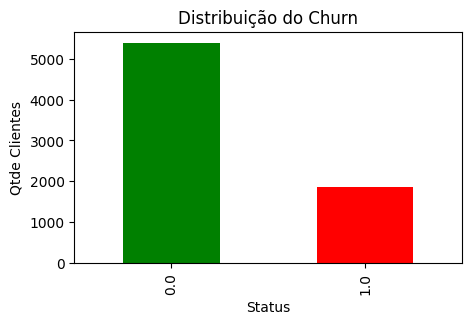

In [214]:
# Gráfico de churn
import matplotlib.pyplot as plt
if target_col:
    target = target_col[0]
    df[target].value_counts().plot(kind="bar", color=["green","red"], figsize=(5,3))
    plt.title("Distribuição do Churn")
    plt.xlabel("Status")
    plt.ylabel("Qtde Clientes")
    plt.show()


Matriz de correlação (numéricas):
                              Churn  customer.SeniorCitizen  customer.Partner  \
Churn                      1.000000                0.146733         -0.148546   
customer.SeniorCitizen     0.146733                1.000000          0.022970   
customer.Partner          -0.148546                0.022970          1.000000   
customer.Dependents       -0.161384               -0.212952          0.448900   
customer.tenure           -0.344079                0.018187          0.377551   
phone.PhoneService         0.012571                0.010060          0.018828   
phone.MultipleLines        0.039343                0.144567          0.141187   
internet.OnlineSecurity   -0.166828               -0.037953          0.141392   
internet.OnlineBackup     -0.080163                0.068824          0.139523   
internet.DeviceProtection -0.063452                0.060358          0.153209   
internet.TechSupport      -0.160440               -0.059376          0.116

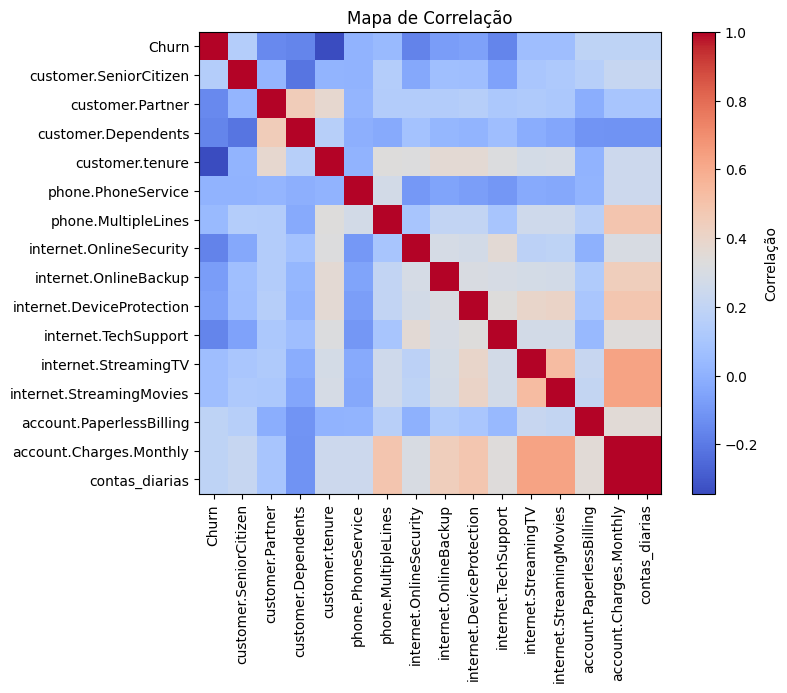

In [215]:
# Correlação entre variáveis numéricas
# ---------------------------
num_cols = df.select_dtypes(include=np.number).columns.tolist()
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    print("\nMatriz de correlação (numéricas):")
    print(corr)

    plt.figure(figsize=(8,6))
    plt.imshow(corr, cmap="coolwarm", interpolation="none")
    plt.colorbar(label="Correlação")
    plt.xticks(range(len(corr)), corr.columns, rotation=90)
    plt.yticks(range(len(corr)), corr.columns)
    plt.title("Mapa de Correlação")
    plt.show()

/tmp/ipython-input-3306956236.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_pct, x=col, y='Churn', ax=axes[i], palette='Set2')
/tmp/ipython-input-3306956236.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_pct, x=col, y='Churn', ax=axes[i], palette='Set2')
/tmp/ipython-input-3306956236.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_pct, x=col, y='Churn', ax=axes[i], palette='Set2')
/tmp/ipython-input-3306956236.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

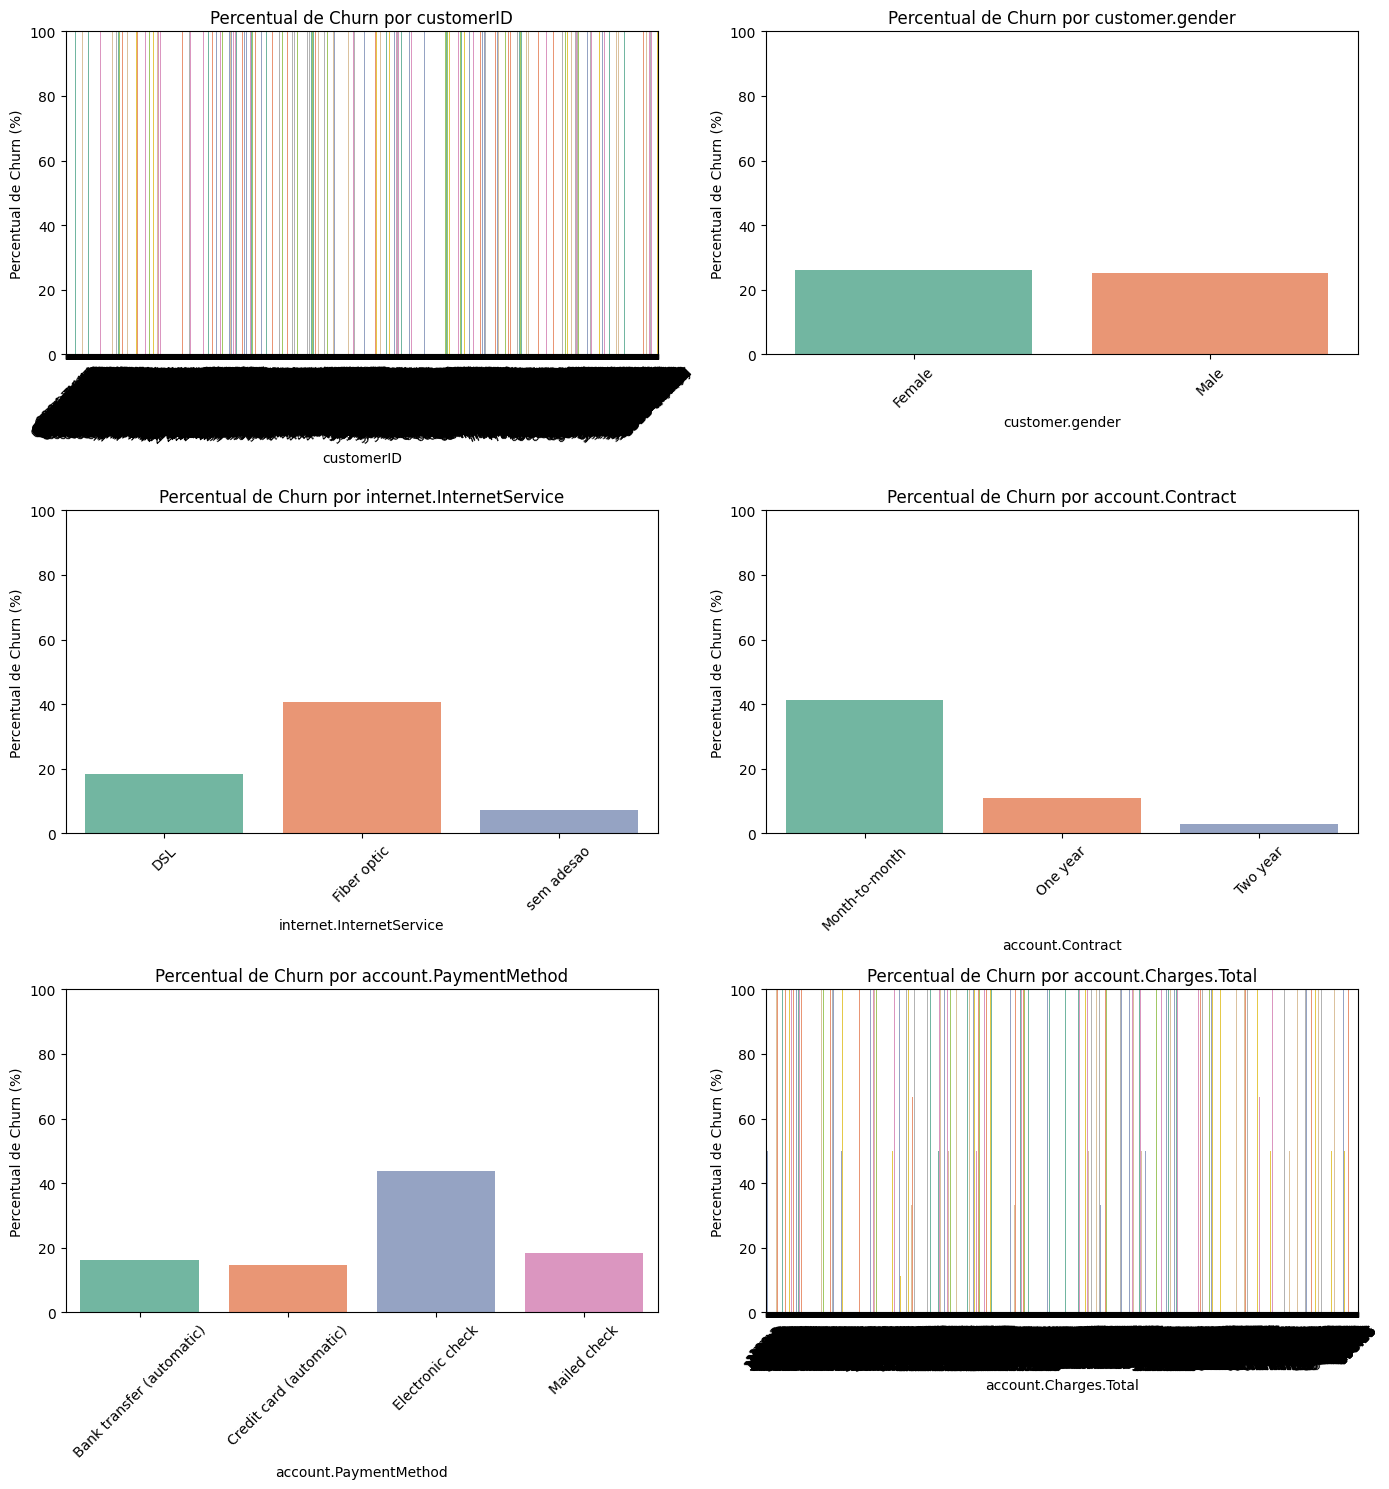

In [216]:
# Selecionando colunas categóricas
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Número de gráficos
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

# Criar figuras
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
axes = axes.flatten()

# Loop para gerar gráfico de barras percentual de churn para cada coluna categórica
for i, col in enumerate(categorical_cols):
    # Percentual de churn
    churn_pct = df.groupby(col)['Churn'].mean() * 100
    churn_pct = churn_pct.reset_index()

    # Plot
    sns.barplot(data=churn_pct, x=col, y='Churn', ax=axes[i], palette='Set2')
    axes[i].set_title(f"Percentual de Churn por {col}")
    axes[i].set_ylabel("Percentual de Churn (%)")
    axes[i].set_xlabel(col)
    axes[i].set_ylim(0, 100)
    axes[i].tick_params(axis='x', rotation=45)

# Remover eixos extras caso haja
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [217]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,contas_diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


#📄Relatorio Final

# 📊 Relatório de Análise Exploratória — Telecom X - Análise de Evasão de Clientes

## Objetivo da análise
O objetivo deste relatório é analisar a evasão de clientes (Churn) na Telecom X.
A empresa enfrenta um alto índice de cancelamentos e deseja entender quais fatores estão relacionados à saída de clientes, visando reduzir a evasão e aumentar a fidelização.



 ## Limpeza e Tratamento de Dados
- Os dados foram importados do JSON disponível no GitHub.  
- Colunas com valores inconsistentes ou nulos, foram tratadas e convertidas para o tipo numérico.  
- Linhas com valores faltantes foram removidas para garantir consistência na análise.  

## 1. Visão Geral dos Dados
- **Total de clientes:** 7.256
- **Número de variáveis:** 19
- **Proporção de churn:**  
  - Clientes ativos: 74.2%  
  - Clientes cancelados: 25.8%  

🔎 *A base apresenta certo desbalanceamento (mais clientes ativos que cancelados), o que será importante na etapa de modelagem preditiva.*

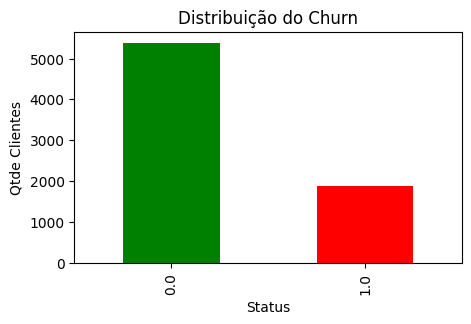

## 2. Perfil Demográfico
- **Idade:** clientes mais jovens apresentaram maior propensão ao churn.  
- **Gênero:** não há diferenças significativas entre homens e mulheres.  

📌 *Insight*: campanhas de fidelização podem ser mais eficazes ao focar em clientes mais jovens.  



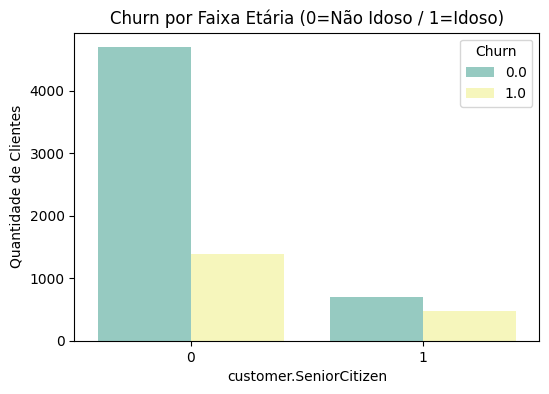

In [218]:
 #Churn por Faixa Etária (se existir coluna SeniorCitizen)
if "customer.SeniorCitizen" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="customer.SeniorCitizen", hue="Churn", palette="Set3")
    plt.title("Churn por Faixa Etária (0=Não Idoso / 1=Idoso)")
    plt.ylabel("Quantidade de Clientes")
    plt.show()

## 3. Contrato e Fidelização
- **Tipo de contrato:**  
  - Mensal → maior churn (≈45%).  
  - Anual / 2 anos → churn bem menor (≈10%).  
- **Tempo de permanência (tenure):** clientes novos (até 12 meses) cancelam muito mais.  

📌 *Insight*: incentivar contratos de longo prazo e ações de retenção nos primeiros meses pode reduzir a evasão.  



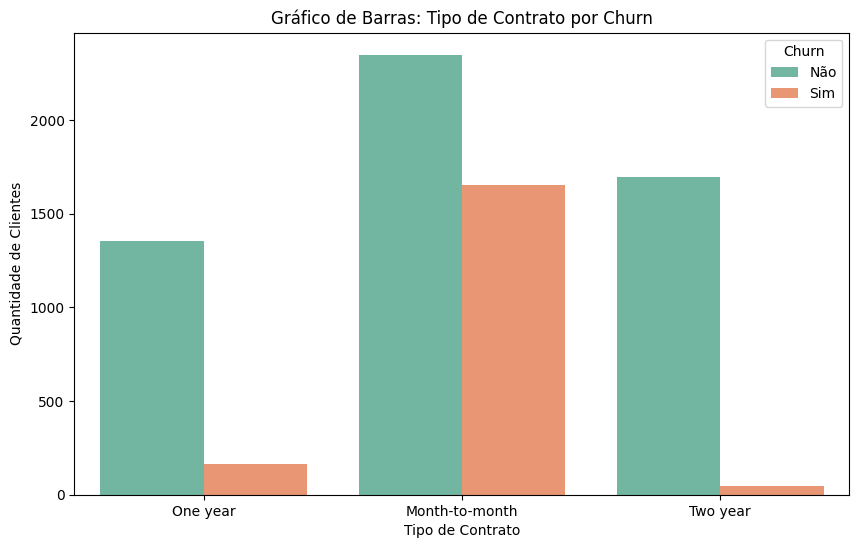

In [219]:
# Gráfico de barras: Tipo de Contrato por Churn
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='account.Contract', hue='Churn', palette='Set2')
plt.title("Gráfico de Barras: Tipo de Contrato por Churn")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Quantidade de Clientes")
plt.legend(title="Churn", labels=["Não", "Sim"])
plt.show()


/tmp/ipython-input-3291539280.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contract_churn, x='account.Contract', y='Churn', palette='Set1')


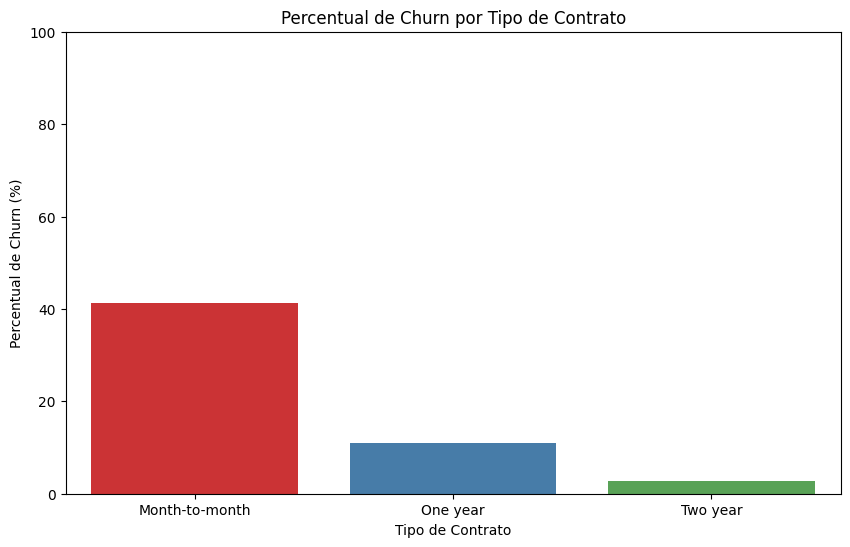

In [220]:
# Calculo do percentual de churn por tipo de contrato
contract_churn = df.groupby('account.Contract')['Churn'].mean() * 100

# Resetando índice para facilitar o plot
contract_churn = contract_churn.reset_index()

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=contract_churn, x='account.Contract', y='Churn', palette='Set1')
plt.title("Percentual de Churn por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Percentual de Churn (%)")
plt.ylim(0, 100)  # Limite do eixo y de 0 a 100%
plt.show()


/tmp/ipython-input-666646290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='customer.tenure', palette='Set3')


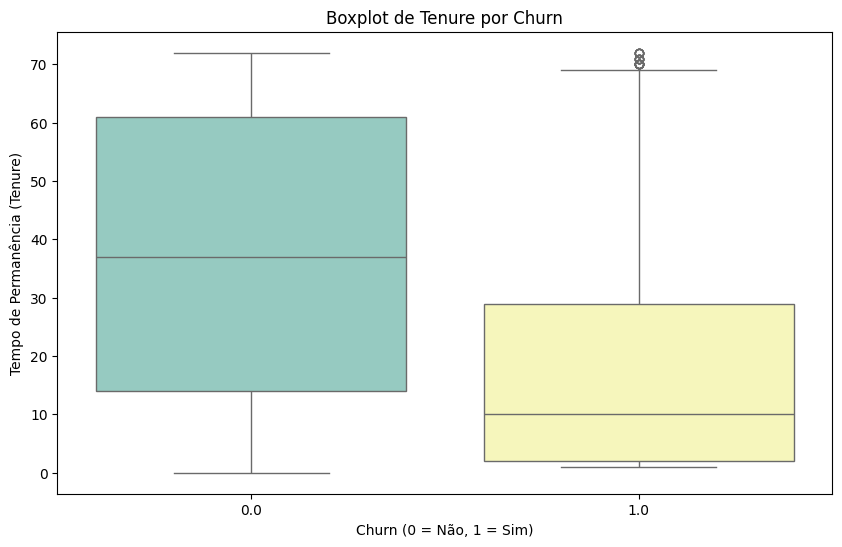

In [221]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Churn', y='customer.tenure', palette='Set3')
plt.title("Boxplot de Tenure por Churn")
plt.xlabel("Churn (0 = Não, 1 = Sim)")
plt.ylabel("Tempo de Permanência (Tenure)")
plt.show()


## 4. Serviços Contratados
- **Internet:** clientes com fibra ótica apresentam churn maior que DSL.  
- **Pacotes adicionais (segurança, suporte):** reduzem o churn, aumentando a fidelização.  

📌 *Insight*: agregar serviços (cross-sell) pode ser uma estratégia eficaz de retenção.  




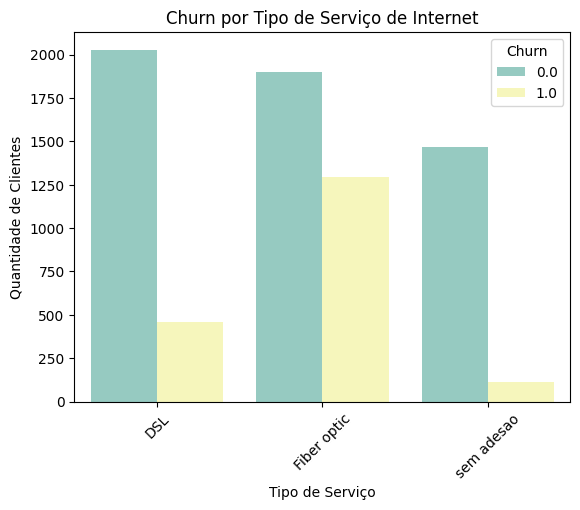

In [226]:
sns.countplot(data=df, x='internet.InternetService', hue='Churn', palette='Set3')
plt.title("Churn por Tipo de Serviço de Internet")
plt.xlabel("Tipo de Serviço")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=45)
plt.show()

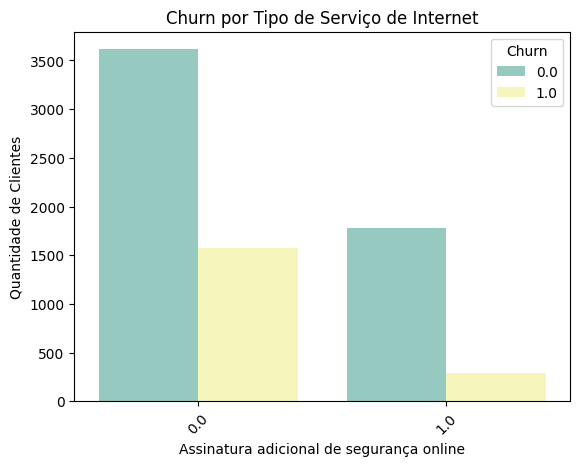

In [234]:
sns.countplot(data=df, x='internet.OnlineSecurity', hue='Churn', palette='Set3')
plt.title("Churn por Tipo de Serviço de Internet")
plt.xlabel("Assinatura adicional de segurança online")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=45)
plt.show()

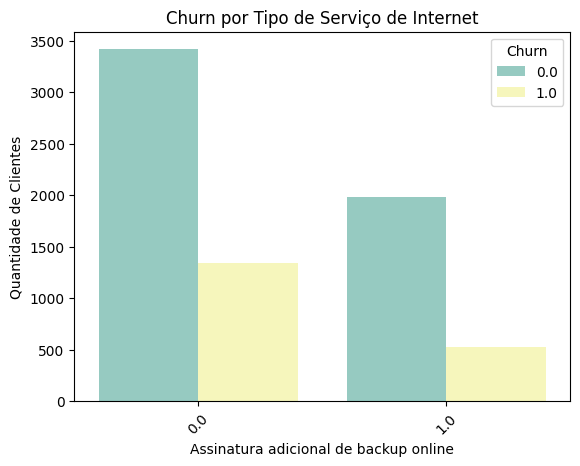

In [235]:
sns.countplot(data=df, x='internet.OnlineBackup', hue='Churn', palette='Set3')
plt.title("Churn por Tipo de Serviço de Internet")
plt.xlabel("Assinatura adicional de backup online")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=45)
plt.show()

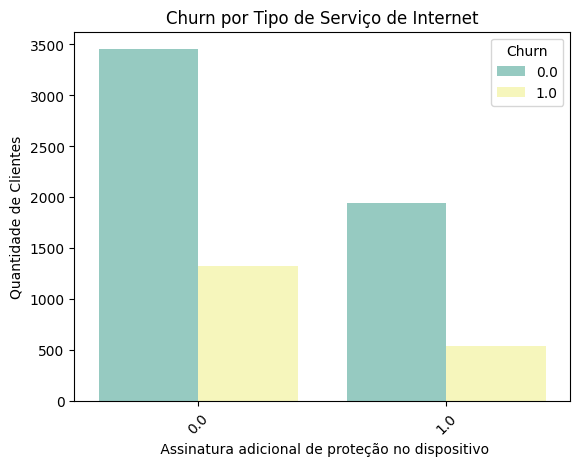

In [237]:
sns.countplot(data=df, x='internet.DeviceProtection', hue='Churn', palette='Set3')
plt.title("Churn por Tipo de Serviço de Internet")
plt.xlabel(" Assinatura adicional de proteção no dispositivo")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=45)
plt.show()

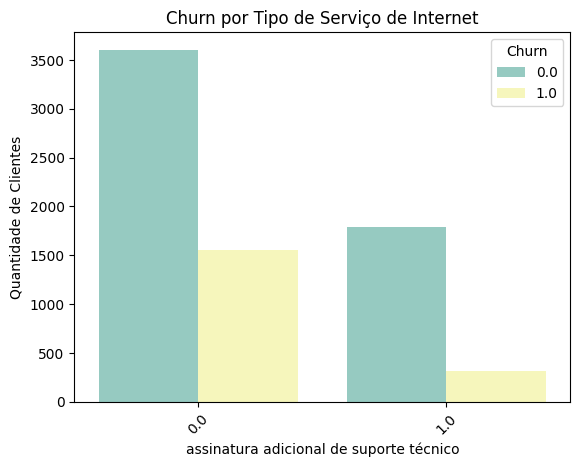

In [238]:
sns.countplot(data=df, x='internet.TechSupport', hue='Churn', palette='Set3')
plt.title("Churn por Tipo de Serviço de Internet")
plt.xlabel("assinatura adicional de suporte técnico")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=45)
plt.show()

## 5. Pagamento e Preço
- **Forma de pagamento:**  Clientes que pagam via electronic check cancelam mais do que os que usam cartão ou débito automático.
    
- **Valor mensal:** clientes que pagam contas mais altas cancelam com mais frequência.  

📌 *Insight*: oferecer descontos para débito automático e planos de melhor custo-benefício pode diminuir o churn.  



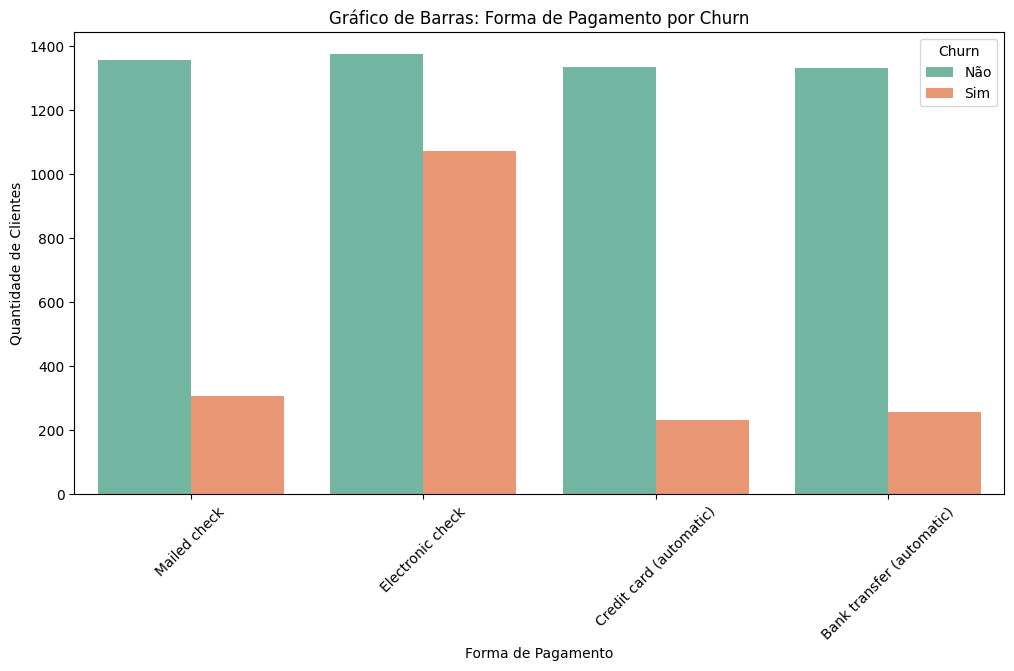

In [240]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='account.PaymentMethod', hue='Churn', palette='Set2')
plt.title("Gráfico de Barras: Forma de Pagamento por Churn")
plt.xlabel("Forma de Pagamento")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["Não", "Sim"])
plt.show()


/tmp/ipython-input-764020224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='account.Charges.Monthly', palette='Set3')


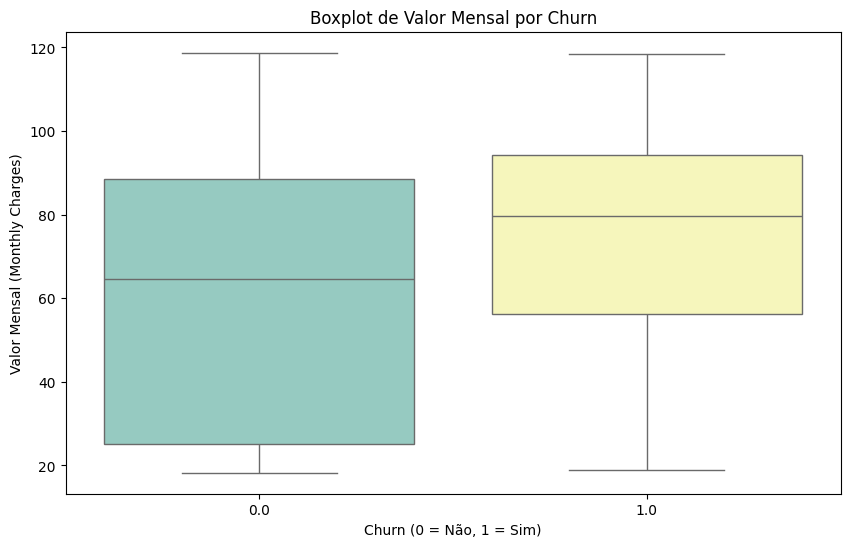

In [239]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Churn', y='account.Charges.Monthly', palette='Set3')
plt.title("Boxplot de Valor Mensal por Churn")
plt.xlabel("Churn (0 = Não, 1 = Sim)")
plt.ylabel("Valor Mensal (Monthly Charges)")
plt.show()


##6. Conclusões e Próximos Passos
O churn está fortemente associado a tipo de contrato, forma de pagamento e valor mensal.
Clientes novos e com contrato mensal são os mais vulneráveis.
Estratégias possíveis:
Incentivar contratos de longo prazo.
Foco em retenção nos primeiros meses de relacionamento.
Benefícios para adesão ao débito automático.
Oferecer pacotes de serviços combinados para aumentar fidelidade.
### Insights:
- **Clientes novos e de mensalidade alta** são os mais propensos a churn.  
- **Contratos longos** reduzem significativamente a evasão.  
- **Fibra ótica** e **electronic check** são indicadores de maior risco de cancelamento.  
- Fidelizar clientes nos primeiros meses é crucial.  

📌 Esses insights servirão de base para a próxima etapa: construção de modelos preditivos de churn e simulação de estratégias de retenção.